# Multinomial Naive Bayes

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [4, 3]

In [64]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    df = pd.read_excel('../data/existing-customers.xlsx')

In [14]:
df.shape

(32561, 15)

In [12]:
df.head()

,RowID,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,Row0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Row1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Row2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Row3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Row4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   RowID           32561 non-null  object
 1   age             32561 non-null  int64 
 2   workclass       30725 non-null  object
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  class           32561 non-null  object
dtypes: int64(5), object(10)
memory usage: 3.7+ MB


In [33]:
categorical_cols = [
    'workclass',
    'education',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'native-country'
]
    
numerical_cols = [
    'age',
    'education-num',
    'capital-gain',
    'capital-loss',
    'hours-per-week'
]

### Handle Missing Values

Naive Bayes classifiers can handle missing values

In [15]:
df.isnull().sum()

RowID                0
age                  0
workclass         1836
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

### Handle Outliers

Naive Bayes classifiers are robust to isolated noise points

### Handle Correlated Attributes

Correlated attributes can degrade the performance of Naive Bayes classifiers

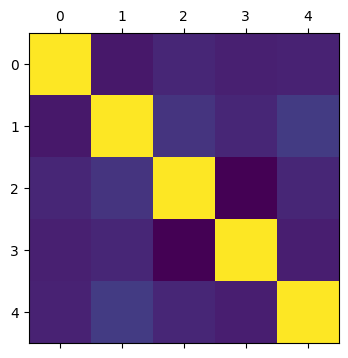

In [19]:
plt.matshow(df[num_cols].corr());

In [62]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.utils import resample

In [65]:
df.drop(['RowID'], axis=1, inplace=True)

df_majority = df[df['class'] == '<=50K']
df_minority = df[df['class'] == '>50K']

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=2)

df = pd.concat([df_majority, df_minority_upsampled])

X = df.drop(['class'], axis=1)
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

ct = ColumnTransformer(
    [('encoder', OneHotEncoder(sparse_output=False, max_categories=5), categorical_cols)], remainder='passthrough')

X_train_transformed  = ct.fit_transform(X_train)
X_test_transformed = ct.transform(X_test)

X_train = pd.DataFrame(
    X_train_transformed, 
    columns=ct.get_feature_names_out()
)

X_test = pd.DataFrame(
    X_test_transformed, 
    columns=ct.get_feature_names_out()
)

### Limit Number of Categories

In [66]:
X_train.shape

(34608, 42)

In [67]:
X_train.head()

,encoder__workclass_Local-gov,encoder__workclass_Private,encoder__workclass_Self-emp-inc,encoder__workclass_Self-emp-not-inc,encoder__workclass_infrequent_sklearn,encoder__education_Bachelors,encoder__education_HS-grad,encoder__education_Masters,encoder__education_Some-college,encoder__education_infrequent_sklearn,...,encoder__native-country_Mexico,encoder__native-country_Philippines,encoder__native-country_United-States,encoder__native-country_nan,encoder__native-country_infrequent_sklearn,remainder__age,remainder__education-num,remainder__capital-gain,remainder__capital-loss,remainder__hours-per-week
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,45.0,11.0,0.0,0.0,40.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,65.0,10.0,0.0,0.0,40.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,23.0,9.0,0.0,0.0,50.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,20.0,10.0,0.0,0.0,40.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,50.0,14.0,7298.0,0.0,50.0


In [68]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
y_pred = mnb.predict(X_test)

print('Accuracy: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.5895
